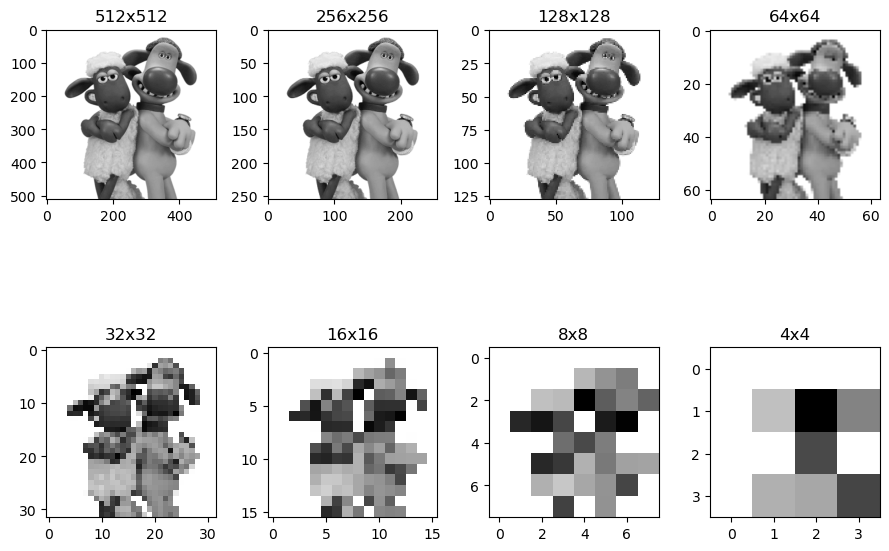

In [25]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image_path = '../images/sample_image.jpg'

def downsample(image, scale):
    h, w = image.shape
    r_h, r_w = h // scale, w // scale
    resized_image = np.zeros((r_h, r_w))
    
    for i in range(r_h):
        for j in range(r_w):
            resized_image[i, j] = image[i * scale, j * scale]
    
    return resized_image

def main():
    original_image = cv2.imread(image_path)  # Loading image
    original_image = cv2.cvtColor(original_image, cv2.COLOR_RGB2GRAY)  # Converting to gray
    
    # Resize the image to 512x512
    resized_image = cv2.resize(original_image, (512, 512))
    
    image_list = [resized_image]
    
    for _ in range(8):
        resized_image = downsample(resized_image, 2)  # Downsample by a factor of 2
        image_list.append(resized_image)
    
    row, col = 2, 4
    fig, axes = plt.subplots(row, col, figsize=(9, 7))  # 4 rows, 2 columns for 8 subplots
    idx = 0
    for i in range(row):
        for j in range(col):
            axes[i, j].imshow(image_list[idx], cmap='gray')
            h = image_list[idx].shape[0]
            w = image_list[idx].shape[1]
            axes[i, j].set_title(f'{h}x{w}')            
            idx += 1
    
    plt.tight_layout()  # Ensures that the subplots are properly arranged
    plt.show()

if __name__ == '__main__':
    main()
